In [1]:
# Import the important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load the data 
path = r"D:/test_set/Test project [data analyst].csv"
df = pd.read_csv(path)

In [7]:
#check the few rows of dataframe
df.head(3)

,Tracking Number,Carrier Name,Service Level,Zones,Weight (lbs),Dimensions (in),Charge Type,Charge,Pickup Zipcode,Dropoff Zipcode,Date of Delivery
0,1Z1234567890123458,UPS,Ground,Zone 6,11,12x12x8,Adult Signature Required,11.25,10005,90001,2023-10-25
1,1Z1234567890123451,FedEx,Ground,Zone 4,5,12x12x8,Additional Tax,5.5,60606,90210,2023-02-15
2,1Z1234567890123456,OSM,2Day,Zone 3,12,12x12x8,Adjustment,7.5,60601,90210,2023-07-10


In [14]:
#checing for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tracking Number   214 non-null    object
 1   Carrier Name      214 non-null    object
 2   Service Level     214 non-null    object
 3   Zones             214 non-null    object
 4   Weight (lbs)      214 non-null    object
 5   Dimensions (in)   214 non-null    object
 6   Charge Type       214 non-null    object
 7   Charge            214 non-null    object
 8   Pickup Zipcode    214 non-null    int64 
 9   Dropoff Zipcode   214 non-null    int64 
 10  Date of Delivery  214 non-null    object
dtypes: int64(2), object(9)
memory usage: 18.5+ KB


In [50]:
#Checking if any duplicate id is present 
duplicate = df.duplicated(['Tracking Number'])
duplicate_check = df[duplicate]
duplicate_check

,Tracking Number,Carrier Name,Service Level,Zones,Weight (lbs),Dimensions (in),Charge Type,Charge,Pickup Zipcode,Dropoff Zipcode,Date of Delivery
207,2E76543LKJHG,Pandion,Ground,3,4 lbs,12x12x8,Future Day Pickup - Additional Handling - Week...,$25.00,30301,94101,2031-08-18
208,3F43210MNBVC,Maergo,Economy,2,4 lbs,12x12x8,Future Day Pickup - Additional Handling - Week...,$25.00,94105,10003,2031-09-30
209,4G10987ZXCVB,UPS,Standard,4,5 lbs,12x12x8,Future Day Pickup - Additional Handling - Week...,$30.00,75201,60605,2031-10-10


In [57]:
for items in duplicate_check["Tracking Number"]:
    all_items = df["Tracking Number"] == items
    print(df[all_items])

    Tracking Number Carrier Name Service Level Zones Weight (lbs)  \
77     2E76543LKJHG       OnTrac        Ground     2        4 lbs   
207    2E76543LKJHG      Pandion        Ground     3        4 lbs   

    Dimensions (in)                                        Charge Type  \
77          12x12x8                                     Declared Value   
207         12x12x8  Future Day Pickup - Additional Handling - Week...   

     Charge  Pickup Zipcode  Dropoff Zipcode Date of Delivery  
77   $25.00           85005            94102       2023-10-15  
207  $25.00           30301            94101       2031-08-18  
    Tracking Number Carrier Name Service Level Zones Weight (lbs)  \
78     3F43210MNBVC          GLS       Economy     5        4 lbs   
208    3F43210MNBVC       Maergo       Economy     2        4 lbs   

    Dimensions (in)                                        Charge Type  \
78          12x12x8                              Declared Value Charge   
208         12x12x8  

In [ ]:
# from the above information we can clearly see that the same parcel get picked by other carrier and have different charge 

In [68]:
#checking the name of the columns
column = df.columns
column

Index(['Tracking Number', 'Carrier Name', 'Service Level', 'Zones',
       'Weight (lbs)', 'Dimensions (in)', 'Charge Type', 'Charge',
       'Pickup Zipcode', 'Dropoff Zipcode', 'Date of Delivery'],
      dtype='object')

In [72]:
#now I will check for unique value in each column, I have already check the tracking number now check the carrier name
carrier = df['Carrier Name'].unique()
service = df['Service Level'].unique()
zones = df['Zones'].unique()    
weight = df['Weight (lbs)'].unique() 
dim = df['Dimensions (in)'].unique() 
charge_type = df['Charge Type'].unique()
charge = df['Charge'].unique()
pickup = df['Pickup Zipcode'].unique()
dropoff = df['Dropoff Zipcode'].unique()
    

In [73]:
carrier


array(['UPS', 'FedEx', 'OSM', 'GLS', 'BetterTrucks', 'DHL', 'Pandion',
       'OnTrac', 'Fedex', 'Maergo'], dtype=object)

In [88]:
#can see the value of FedEX and Fedex are same
df["Carrier Name"] = df["Carrier Name"].replace('Fedex', 'FedEx')
df["Carrier Name"].unique()

array(['UPS', 'FedEx', 'OSM', 'GLS', 'BetterTrucks', 'DHL', 'Pandion',
       'OnTrac', 'Maergo'], dtype=object)

In [89]:
service
# I will now change the value of 2day to same day


array(['Ground', '2Day', 'Next Day Air', 'Standard', 'Express',
       'Priority', 'Economy', 'Expedited'], dtype=object)

In [99]:
df["Service Level"] = df["Service Level"].replace('2Day', 'Same day')
df['Service Level'].unique()

array(['Ground', 'Same day', 'Next Day Air', 'Standard', 'Express',
       'Priority', 'Economy', 'Expedited'], dtype=object)

In [106]:
zones
#non uniform data of Zone
df["Zones"] = df['Zones'].replace(('1','2','3','4','5') ,('Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'))

In [107]:
df['Zones'].unique()

array(['Zone 6', 'Zone 4', 'Zone 3', 'Zone 1', 'Zone 2', 'Zone 5'],
      dtype=object)

In [108]:
#now I will check the weight of column
weight
#some values in lbs or some without lbs, since we know the weight column in lbs unit so will will remove the lbs unit from rows

array(['11', '5', '12', '7', '8', '6', '10', '9', '4', '4 lbs', '5 lbs',
       '6 lbs', '7 lbs', '8 lbs'], dtype=object)

In [109]:
df['Weight (lbs)'] = df['Weight (lbs)'].replace(('4 lbs', '5 lbs', '6 lbs', '7 lbs', '8 lbs'), ('4', '5', '6', '7', '8'))

In [119]:
#Changing the data type of the column 
df['Weight (lbs)'] =df['Weight (lbs)'].astype(int)


In [120]:
df['Weight (lbs)'].unique()

array([11,  5, 12,  7,  8,  6, 10,  9,  4])

In [111]:
dim
#No need to change anything in dimension column

array(['12x12x8', '10x10x6', '12x10x6', '14x14x10', '16x16x12', '12x8x6',
       '12x10x8', '14x12x10', '14x12x8'], dtype=object)

In [122]:
charge
#Again some values in $ some are without $ so we will make all the values without $

array(['11.25', '5.5', '7.5', '9', '10', '6.25', '7.25', '12.75', '8.75',
       '8.25', '11.5', '7.75', '10.75', '12', '6.5', '9.5', '$25.00',
       '$30.00', '$28.50', '$32.00', '$27.00', '$25.50', '$35.00',
       '$26.75', '$29.25', '$27.50', '$26.00'], dtype=object)

In [127]:
df['Charge'] = df['Charge'].replace(('$25.00',
       '$30.00', '$28.50', '$32.00', '$27.00', '$25.50', '$35.00',
       '$26.75', '$29.25', '$27.50', '$26.00'), ('25.00',
       '30.00', '28.50', '32.00', '27.00', '25.50', '35.00',
       '26.75', '29.25', '27.50', '26.00'))

In [128]:
df['Charge'].unique()

array(['11.25', '5.5', '7.5', '9', '10', '6.25', '7.25', '12.75', '8.75',
       '8.25', '11.5', '7.75', '10.75', '12', '6.5', '9.5', '25.00',
       '30.00', '28.50', '32.00', '27.00', '25.50', '35.00', '26.75',
       '29.25', '27.50', '26.00'], dtype=object)

In [129]:
df['Charge'] = df['Charge'].astype(float)

In [130]:
df['Charge'].unique()

array([11.25,  5.5 ,  7.5 ,  9.  , 10.  ,  6.25,  7.25, 12.75,  8.75,
        8.25, 11.5 ,  7.75, 10.75, 12.  ,  6.5 ,  9.5 , 25.  , 30.  ,
       28.5 , 32.  , 27.  , 25.5 , 35.  , 26.75, 29.25, 27.5 , 26.  ])

In [131]:
pickup

array([10005, 60606, 60601, 90001, 90002, 90210, 30303, 85001, 20001,
       90010, 75202, 60610, 30302, 85005, 94101, 20002, 60605, 10001,
       90005, 94102, 75201, 60602, 85002, 10010, 30301, 94105, 20003],
      dtype=int64)

In [132]:
dropoff

array([90001, 90210, 90002, 60606, 60601, 30303, 10005, 10001, 94102,
       75201, 30301, 60605, 80202, 20001, 94105, 10002, 20002, 90005,
       30305, 85002, 20003, 90010, 80201, 30302, 94101, 85005, 30304,
       10003, 85001, 60602], dtype=int64)

The values of pickup and dropoff column looks fine so we will skip this column and continue with our clean dataframe

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tracking Number   214 non-null    object 
 1   Carrier Name      214 non-null    object 
 2   Service Level     214 non-null    object 
 3   Zones             214 non-null    object 
 4   Weight (lbs)      214 non-null    int32  
 5   Dimensions (in)   214 non-null    object 
 6   Charge Type       214 non-null    object 
 7   Charge            214 non-null    float64
 8   Pickup Zipcode    214 non-null    int64  
 9   Dropoff Zipcode   214 non-null    int64  
 10  Date of Delivery  214 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 17.7+ KB


Now you can see how we change the datatype of the certain columns change and we have clean dataframe to utilize further analysis

In [139]:
#Changing the column name since the charges are in dollar
df = df.rename(columns={'Charge': 'Charge ($)'})
df.head(5)

,Tracking Number,Carrier Name,Service Level,Zones,Weight (lbs),Dimensions (in),Charge Type,Charge ($),Pickup Zipcode,Dropoff Zipcode,Date of Delivery
0,1Z1234567890123458,UPS,Ground,Zone 6,11,12x12x8,Adult Signature Required,11.25,10005,90001,2023-10-25
1,1Z1234567890123451,FedEx,Ground,Zone 4,5,12x12x8,Additional Tax,5.50,60606,90210,2023-02-15
2,1Z1234567890123456,OSM,Same day,Zone 3,12,12x12x8,Adjustment,7.50,60601,90210,2023-07-10
3,1Z1234567890123459,UPS,Ground,Zone 6,11,12x12x8,Adult Signature Required,11.25,10005,90001,2023-10-25
4,1Z1234567890123454,GLS,Next Day Air,Zone 1,7,12x12x8,Addl. Handling Weight,9.00,10005,90002,2023-05-30


In [293]:
 # saving the dataframe
df.to_csv('test_project.csv')

In [273]:
df_plot = df[['Carrier Name', 'Service Level', 'Weight (lbs)', 'Charge ($)']]

In [274]:
df_plot

,Carrier Name,Service Level,Weight (lbs),Charge ($)
0,UPS,Ground,11,11.25
1,FedEx,Ground,5,5.50
2,OSM,Same day,12,7.50
3,UPS,Ground,11,11.25
4,GLS,Next Day Air,7,9.00
...,...,...,...,...
209,UPS,Standard,5,30.00
210,FedEx,Express,4,25.00
211,DHL,Priority,4,25.00
212,OnTrac,Ground,4,25.00


In [275]:
weight_plot = df_plot.groupby('Weight (lbs)')['Charge ($)'].sum()
weight_plot

Weight (lbs)
4     4207.75
5      583.25
6      206.00
7       53.00
8       57.00
9       34.25
10      18.00
11      22.50
12      15.75
Name: Charge ($), dtype: float64

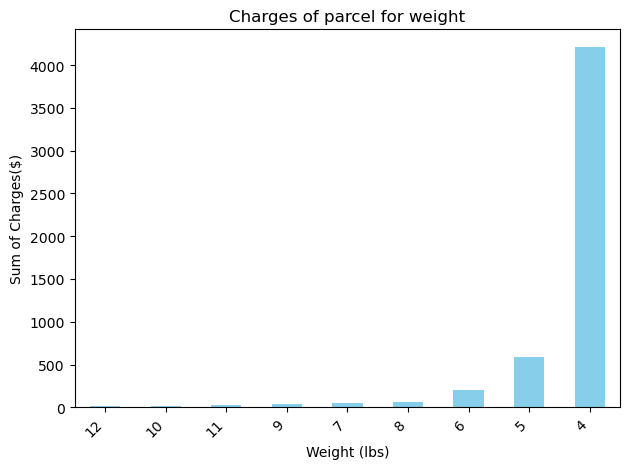

In [276]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = weight_plot.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Weight (lbs)')
plt.ylabel('Sum of Charges($)')
plt.title('Charges of parcel for Weight')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [277]:
service_plot = df_plot.groupby('Service Level')['Charge ($)'].sum()
service_plot

Service Level
Economy         1089.50
Expedited         25.50
Express         1110.00
Ground          1205.00
Next Day Air      42.50
Priority         581.25
Same day          33.25
Standard        1110.50
Name: Charge ($), dtype: float64

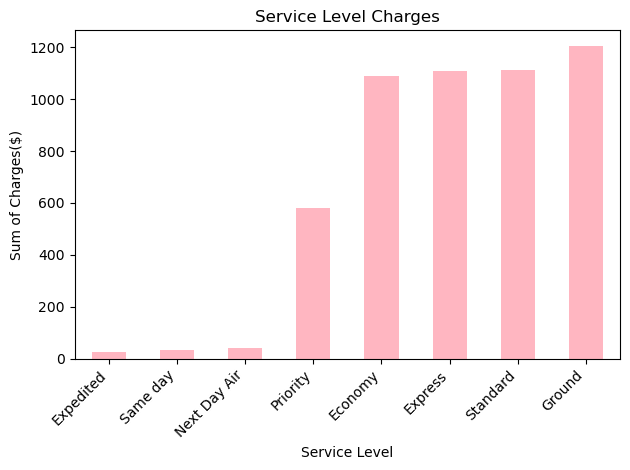

In [289]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = service_plot.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightpink')
plt.xlabel('Service Level')
plt.ylabel('Sum of Charges($)')
plt.title('Service Level Charges')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [279]:
carrier_plot = df_plot.groupby('Service Level')['Carrier Name'].count()
carrier_plot

Service Level
Economy         42
Expedited        1
Express         43
Ground          55
Next Day Air     4
Priority        23
Same day         4
Standard        42
Name: Carrier Name, dtype: int64

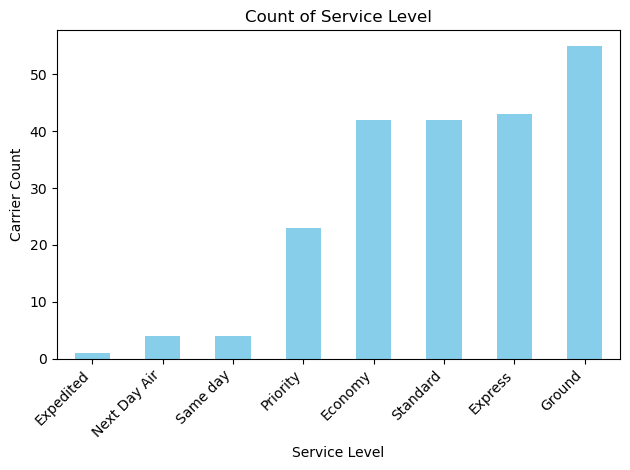

In [280]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = carrier_plot.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Service Level')
plt.ylabel('Carrier Count')
plt.title('Count of Service Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [282]:
parcel_4lbs = df_plot['Weight (lbs)'] == 4

carrier_parcel_4lbs = df_plot[parcel_4lbs].groupby('Carrier Name')['Charge ($)'].sum()
carrier_parcel_4lbs
#parcel4

Carrier Name
BetterTrucks    526.50
DHL             554.50
FedEx           452.50
GLS             452.00
Maergo          429.25
OSM             500.50
OnTrac          515.75
Pandion         501.75
UPS             275.00
Name: Charge ($), dtype: float64

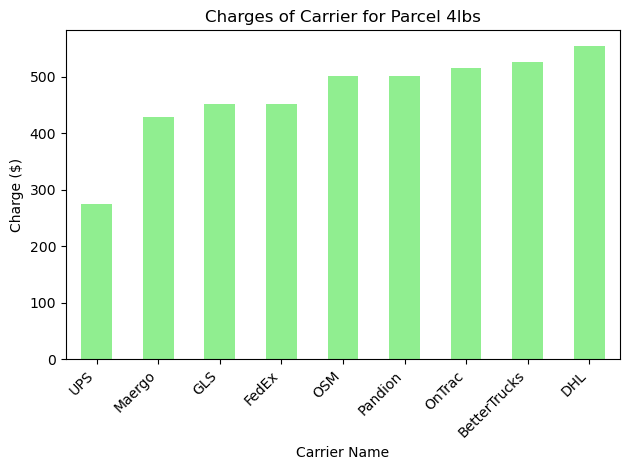

In [290]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = carrier_parcel_4lbs.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Carrier Name')
plt.ylabel('Charge ($)')
plt.title('Charges of Carrier for Parcel 4lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [285]:
parcel_5lbs = df_plot['Weight (lbs)'] == 5
carrier_parcel_5lbs = df_plot[parcel_5lbs].groupby('Carrier Name')['Charge ($)'].sum()
carrier_parcel_5lbs

Carrier Name
FedEx       95.50
GLS         37.75
Maergo     120.00
Pandion     30.00
UPS        300.00
Name: Charge ($), dtype: float64

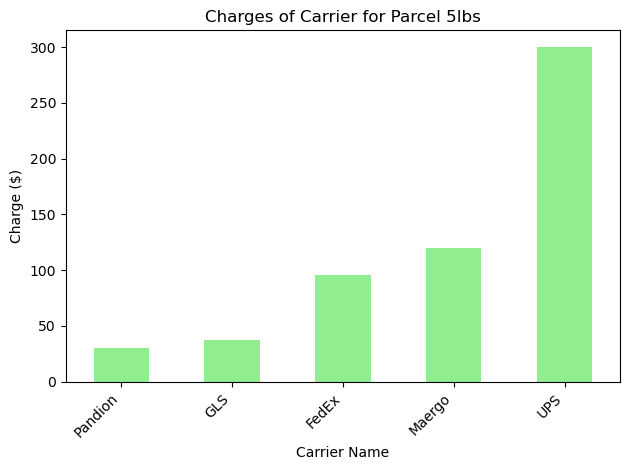

In [291]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = carrier_parcel_5lbs.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Carrier Name')
plt.ylabel('Charge ($)')
plt.title('Charges of Carrier for Parcel 5lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [287]:
parcel_5lbs = df_plot['Weight (lbs)'] == 5
service_parcel_5lbs = df_plot[parcel_5lbs].groupby('Service Level')['Charge ($)'].sum()
service_parcel_5lbs

Service Level
Economy     120.00
Express     120.00
Ground       43.25
Standard    300.00
Name: Charge ($), dtype: float64

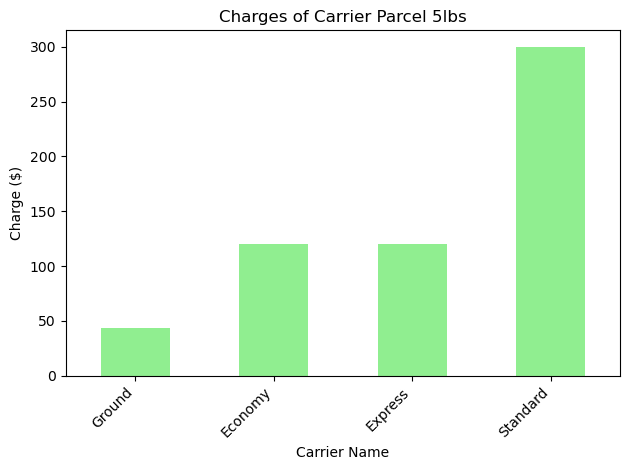

In [292]:
# Sort the grouped data by mean charge in ascending order
grouped_data_sorted = service_parcel_5lbs.sort_values()

# Plot bar chart
grouped_data_sorted.plot(kind='bar', color='lightgreen')
plt.xlabel('Carrier Name')
plt.ylabel('Charge ($)')
plt.title('Charges of Carrier Parcel 5lbs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()